# KMeans Clustering IRIS
* 그룹헤더 선출

<img src='https://miro.medium.com/max/875/0*8ERlq_ZmWnZzDO83.gif' width=400>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------- 군집 --------------
from sklearn.cluster import KMeans

# -------------- 분류 --------------
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score,  confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("iris_lkh.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 1차 점수 : 우선 점수부터 보자

In [6]:
df2 = df[['petal_length', 'petal_width']].copy()

In [7]:
model = KMeans(n_clusters=3)
model.fit(df2)
pred = model.predict(df2)
print(pred[:5])
print(model.cluster_centers_)
cx = []
cy = []
for row in model.cluster_centers_:
    cx.append(row[0])
    cy.append(row[1])
print(cx, cy)    

[0 0 0 0 0]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
[1.4620000000000002, 5.595833333333333, 4.269230769230769] [0.24600000000000055, 2.0375, 1.3423076923076924]


In [8]:
df_pred = df2.copy() 
df_pred["target"] = df["target"]
df_pred["cluster_label"] = pred.reshape(-1,1)
df_pred.head()

,petal_length,petal_width,target,cluster_label
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


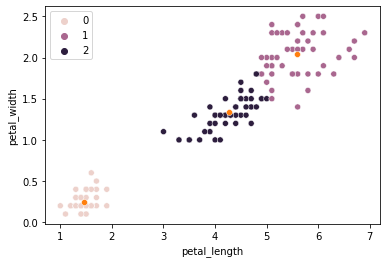

In [9]:
cc = pd.DataFrame(model.cluster_centers_)
sns.scatterplot(data=df_pred, x='petal_length', y='petal_width', hue='cluster_label')
sns.scatterplot(data=cc, x=0, y=1)
plt.show()

## 모델 평가 

* 1) 교차테이블

In [10]:
cross = pd.crosstab(df_pred["target"], df_pred["cluster_label"] )
cross

cluster_label,0,1,2
target,,,
0,50,0,0
1,0,2,48
2,0,46,4


## 정규화 가공

array([[<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

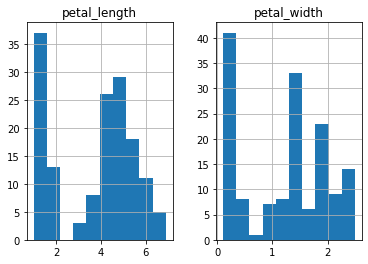

In [11]:
df2.hist()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df2)
df2 = pd.DataFrame(scaler_df, columns=['petal_length', 'petal_width'])
df2.head()

,petal_length,petal_width
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


In [13]:
model = KMeans(n_clusters=3)
model.fit(df2)
pred = model.predict(df2)
print(pred[:5])
print(model.cluster_centers_)
cx = []
cy = []
for row in model.cluster_centers_:
    cx.append(row[0])
    cy.append(row[1])
print(cx, cy)    

[1 1 1 1 1]
[[ 1.02799959  1.12797813]
 [-1.30498732 -1.25489349]
 [ 0.3058728   0.16541778]]
[1.0279995947773688, -1.3049873219363295, 0.3058727989904363] [1.127978125880969, -1.254893490234201, 0.1654177782581444]


In [14]:
df_pred = df2.copy() 
df_pred["target"] = df["target"]
df_pred["cluster_label"] = pred.reshape(-1,1)
df_pred.head()


,petal_length,petal_width,target,cluster_label
0,-1.340227,-1.315444,0,1
1,-1.340227,-1.315444,0,1
2,-1.397064,-1.315444,0,1
3,-1.283389,-1.315444,0,1
4,-1.340227,-1.315444,0,1


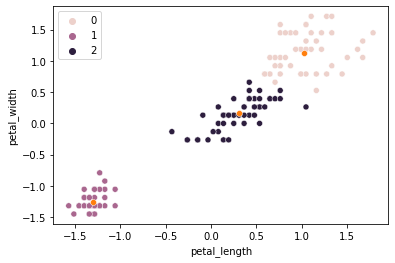

In [15]:
cc = pd.DataFrame(model.cluster_centers_)
sns.scatterplot(data=df_pred, x='petal_length', y='petal_width', hue='cluster_label')
sns.scatterplot(data=cc, x=0, y=1)
plt.show()

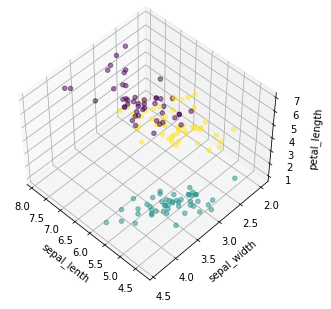

In [16]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(4,4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df['sepal_length'],df['sepal_width'],df['petal_length'],c=df_pred['cluster_label'],alpha=0.5)
ax.set_xlabel('sepal_lenth')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()

## 2차 : 모델 평가 
* 정규화 후 모델 재평가

* 1) 교차테이블

In [17]:
cross = pd.crosstab(df_pred["target"], df_pred["cluster_label"] )
cross

cluster_label,0,1,2
target,,,
0,0,50,0
1,2,0,48
2,46,0,4


### 두개의 피쳐만 사용하면 클러스터값은 3이 아니다 

In [18]:
my_cluster = np.arange(1, 11)
my_cluster

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
inertia_list = []
for k in my_cluster:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertia_list.append(model.inertia_)   #대표노드와 각 노드간의 거리 합
print(inertia_list)    

[300.00000000000017, 54.16878133149558, 18.02696261254406, 12.283372197379125, 9.160517414653057, 7.261410808647261, 6.138071515322073, 5.151939084810507, 4.419295672800332, 4.131103430652309]


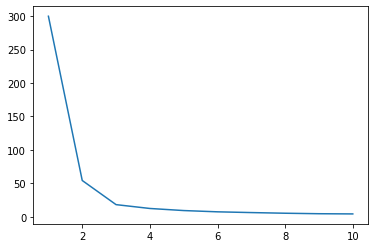

In [20]:
plt.plot(my_cluster, inertia_list)
plt.show()

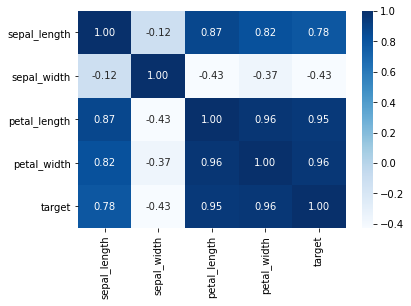

In [21]:
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='Blues')
plt.show()

## 실루엣 점수

In [22]:
#Silhouette Coefficient for each sample
# 스케터의 모든점-헤더 유클리드거리    
from sklearn.metrics import silhouette_samples 

silhouette_coef = silhouette_samples(df_pred[['petal_length','petal_width']] , df_pred['cluster_label']  )

In [23]:
print(silhouette_coef.shape)
print(silhouette_coef[:5])

(150,)
[0.93612714 0.93612714 0.92670799 0.93457942 0.93612714]


In [24]:
df_pred['silhouette_coef'] = silhouette_coef.reshape(-1,1)
df_pred.head()

,petal_length,petal_width,target,cluster_label,silhouette_coef
0,-1.340227,-1.315444,0,1,0.936127
1,-1.340227,-1.315444,0,1,0.936127
2,-1.397064,-1.315444,0,1,0.926708
3,-1.283389,-1.315444,0,1,0.934579
4,-1.340227,-1.315444,0,1,0.936127


In [25]:
from sklearn.metrics import silhouette_score


* (b - a) / max(a, b)

In [26]:
silhouette_score = silhouette_score(df_pred[['petal_length','petal_width']] , df_pred['cluster_label']  )
silhouette_score

0.6741313115143868

In [27]:
df_pred.groupby('cluster_label')['silhouette_coef'].mean()

cluster_label
0    0.510323
1    0.904516
2    0.603815
Name: silhouette_coef, dtype: float64

In [28]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


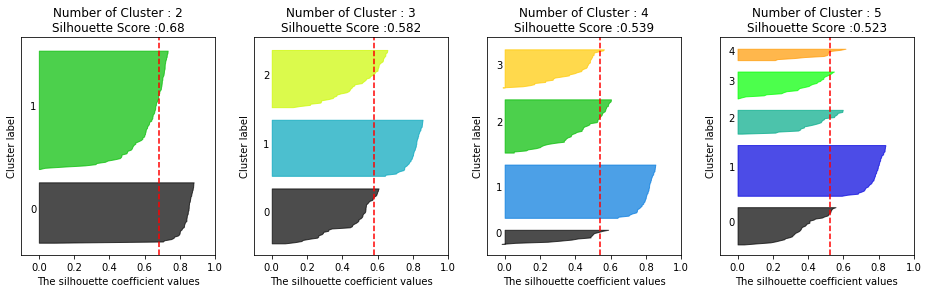

In [29]:
visualize_silhouette([ 2, 3, 4,5 ], df)

## PCA
* petal_width, petal_length (silhouette score): 0.6741313115143868

In [30]:
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [31]:
from sklearn.decomposition import PCA
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
pca = PCA(n_components=2, copy=True, random_state=1414)
pca_res = pca.fit_transform(X)
# type(pca_res)
pca_df = pd.DataFrame(pca_res, columns=['pc1','pc2'])
pca_df.shape

(150, 2)

0.9246187232017271 [0.92461872]
0.977685206318795 [0.92461872 0.05306648]
0.9947878161267247 [0.92461872 0.05306648 0.01710261]
1.0 [0.92461872 0.05306648 0.01710261 0.00521218]


<AxesSubplot:>

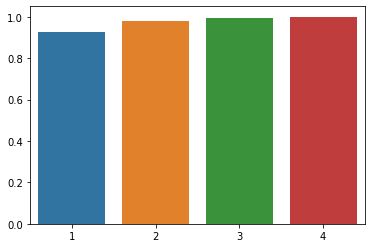

In [32]:
n_comp = [1,2,3,4]
pca_list = [] 
for n in n_comp:
    pca = PCA(n_components=n, copy=True, random_state=1414)
    pca_res = pca.fit_transform(X)
    print(pca.explained_variance_ratio_.sum() , pca.explained_variance_ratio_)    
    pca_list.append(pca.explained_variance_ratio_.sum())
sns.barplot(data=X, x=n_comp, y=pca_list)

In [33]:
pca = PCA(n_components=2, copy=True, random_state=1414)
pca_res = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_res, columns=['pc1','pc2'])
print(pca_df.shape)
pca_df["target"] = df["target"]
pca_df.head()

(150, 2)


,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(pca_df[['pc1','pc2']])
scaler_df = pd.DataFrame(scaler_df, columns=['pc1', 'pc2'])
pca_df["target"] = df["target"]
scaler_df.head()

,pc1,pc2
0,-1.309711,0.650541
1,-1.324357,-0.360512
2,-1.409674,-0.295230
3,-1.339582,-0.648304
4,-1.331469,0.665527


## PCA이후 산점도

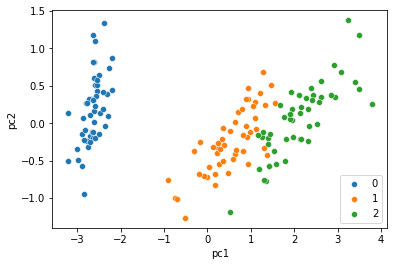

In [ ]:
sns.scatterplot(data=pca_df[pca_df['target']==0], x="pc1", y="pc2", label="0")
sns.scatterplot(data=pca_df[pca_df['target']==1], x="pc1", y="pc2", label="1")
sns.scatterplot(data=pca_df[pca_df['target']==2], x="pc1", y="pc2", label="2")
plt.legend()
plt.show()

# 3차 점수 확인 : PCA 후

In [35]:
my_cluster = np.arange(1, 11)
inertia_list = []

inertia_list = []
for k in my_cluster:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertia_list.append(model.inertia_)   #대표노드와 각 노드간의 거리 합
print(inertia_list)   

[766.1659556405622, 163.86413939369896, 73.10117647782648, 52.91103843719557, 37.46034849373916, 30.122279098234433, 23.585016375821866, 19.55250485254846, 17.43914616647154, 15.377594625643725]


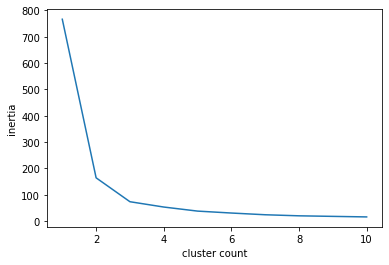

In [36]:
plt.plot(np.arange(1, 11), inertia_list)
plt.xlabel("cluster count")
plt.ylabel("inertia")
plt.show()

## cluster 수 4개

In [47]:
model = KMeans(n_clusters=4)
model.fit(pca_df)
pred = model.predict(pca_df)
pca_df["cluster_label"] = pred.reshape(-1,1)
pca_df.head()


,pc1,pc2,target,cluster_label
0,-2.684126,0.319397,0,1
1,-2.714142,-0.177001,0,1
2,-2.888991,-0.144949,0,1
3,-2.745343,-0.318299,0,1
4,-2.728717,0.326755,0,1


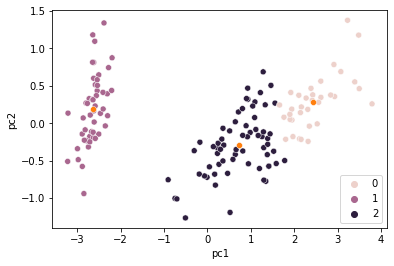

In [41]:
cc = pd.DataFrame(model.cluster_centers_)
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='cluster_label')
sns.scatterplot(data=cc, x=0, y=1)
plt.show()

In [43]:
# silhouette_score = silhouette_score(pca_df[['pc1','pc2']] , pca_df['cluster_label']  )
